In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler


In [73]:
# Load and split the data
X = np.loadtxt("/Users/jackarnott/git/Scientific-Computing-Case-Study/Data/iris_data.csv", delimiter=',')
y = np.loadtxt("/Users/jackarnott/git/Scientific-Computing-Case-Study/Data/iris_types.csv",dtype=int, delimiter=',')
lbl_clf = LabelEncoder()
Y_encoded = lbl_clf.fit_transform(y)
Y_final = tf.keras.utils.to_categorical(Y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
std_clf = StandardScaler()
x_train_new = std_clf.fit_transform(X_train)
x_test_new = std_clf.transform(X_test)

In [67]:
y_train

array([2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2])

In [74]:
print(np.shape(x_train_new))
print(np.shape(y_train))

(80, 4)
(80,)


In [58]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=4, activation=tf.nn.relu, kernel_initializer='he_normal', 
                                kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(7, activation=tf.nn.relu, kernel_initializer='he_normal', 
                                kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(5, activation=tf.nn.relu, kernel_initializer='he_normal', 
                                kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
# Train the model and report accuracy
history = model.fit(X_train, y_train,epochs=300)

Epoch 1/300


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 3)

In [70]:
accuracy = model.evaluate(X_test, y_test)

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 3)

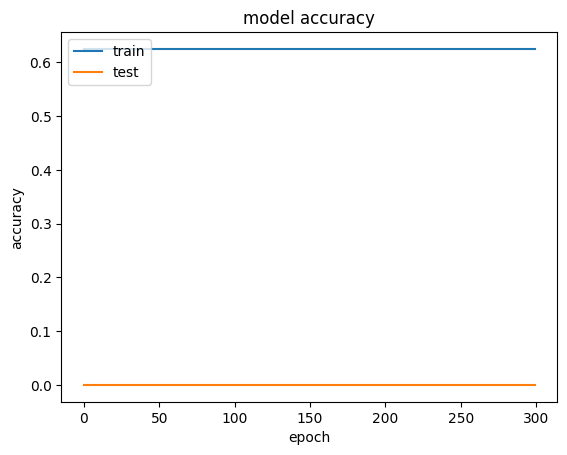

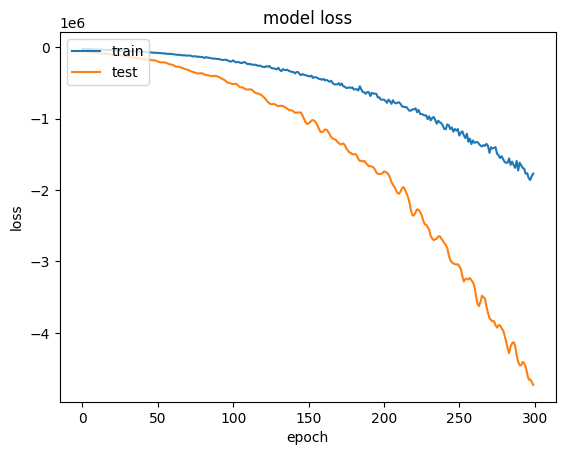

In [31]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Improvements
- Boosting


In [36]:
# Descision Tree Algorithm; probably not relevant
X = np.loadtxt("/Users/jackarnott/git/Scientific-Computing-Case-Study/Data/iris_data.csv", delimiter=',')
y = np.loadtxt("/Users/jackarnott/git/Scientific-Computing-Case-Study/Data/iris_types.csv",dtype=int, delimiter=',')
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.5)
from sklearn import tree
classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.96
